#Coronavirus World Data Analysis
#### This is a starter project about global data on covid cases. If you'd like a copy of the dataset please contact me. In this notebook, we are going to explore and prepare the data, model some data and come to conclusions about what we find.

Loading all necessary libraries.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.0f}'.format
pd.set_option('display.max_rows', None)
# load data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CRWK_CN6009_2023/worldometer_corona.csv')
df.head(5)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,331198130,5032179,NaN,162804,NaN,2576668,NaN,2292707,18296,15194,492,63139605,190640,Americas
1,Brazil,South America,212710692,2917562,NaN,98644,NaN,2047660,NaN,771258,8318,13716,464,13206188,62085,Americas
2,India,Asia,1381344997,2025409,NaN,41638,NaN,1377384,NaN,606387,8944,1466,30,22149351,16035,South-EastAsia
3,Russia,Europe,145940924,871894,NaN,14606,NaN,676357,NaN,180931,2300,5974,100,29716907,203623,Europe
4,South Africa,Africa,59381566,538184,NaN,9604,NaN,387316,NaN,141264,539,9063,162,3149807,53044,Africa


Now we are going to prepare the data so it is more relevant to the answers we are looking for.


In [55]:
#dropped totaltests, WHO region, test/1m pop
df2 = df.drop(columns=['WHO Region', 'Tests/1M pop', 'TotalTests'])
df2.head(5)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop
0,USA,North America,331198130,5032179,NaN,162804,NaN,2576668,NaN,2292707,18296,15194,492
1,Brazil,South America,212710692,2917562,NaN,98644,NaN,2047660,NaN,771258,8318,13716,464
2,India,Asia,1381344997,2025409,NaN,41638,NaN,1377384,NaN,606387,8944,1466,30
3,Russia,Europe,145940924,871894,NaN,14606,NaN,676357,NaN,180931,2300,5974,100
4,South Africa,Africa,59381566,538184,NaN,9604,NaN,387316,NaN,141264,539,9063,162


Removed unecessary columns

In [56]:
df2. isna(). sum(). sum() #initially 758 nulls in our dataframe, get rid or replace the null values.

758

In [57]:
df2['NewCases'].isna().sum() #205 nulls

205

In [58]:
df2['NewDeaths'].isna().sum() #206 nulls

206

In [59]:
df2['NewRecovered'].isna().sum() #206 nulls

206

Lets replace the missing values with the mean of the filled in values. Note this is not always the best way of representing the null values as the averages can be overboard or too low. Deleting nulls was also an option but at that point it would ruin the dataset.

In [60]:
df2['NewCases'] = df2['NewCases'].fillna(df2["NewCases"].mean())

In [61]:
df2['NewCases']

0     1980
1     1980
2     1980
3     1980
4     1980
5     6590
6     1980
7     1980
8     1980
9     1980
10    1980
11    1980
12    1980
13    1980
14    1980
15    1980
16    1980
17    1980
18    1980
19    1980
20    1980
21    1980
22    1980
23    1980
24    1980
25    1980
26    1980
27    1980
28    1282
29    1980
30    1980
31    1980
32    1980
33    1980
34    1980
35    1980
36    1980
37    1980
38    1980
39    1980
40    1980
41    1980
42    1980
43    1980
44    1980
45    1980
46    1980
47    1980
48    1980
49    1980
50    1980
51    1980
52    1980
53    1980
54    1980
55    1980
56    1980
57    1980
58    1980
59    1980
60    1980
61    1980
62    1980
63    1980
64    1980
65    1980
66    1980
67    1980
68    1980
69    1980
70    1980
71    1980
72      20
73    1980
74    1980
75    1980
76    1980
77    1980
78    1980
79    1980
80    1980
81    1980
82    1980
83    1980
84    1980
85    1980
86    1980
87    1980
88    1980
89    1980
90    1980

In [62]:
df2['NewDeaths'] = df2['NewDeaths'].fillna(df2["NewDeaths"].mean())

In [63]:
df2['NewDeaths']

0     300
1     300
2     300
3     300
4     300
5     819
6     300
7     300
8     300
9     300
10    300
11    300
12    300
13    300
14    300
15    300
16    300
17    300
18    300
19    300
20    300
21    300
22    300
23    300
24    300
25    300
26    300
27    300
28     80
29    300
30    300
31    300
32    300
33    300
34    300
35    300
36    300
37    300
38    300
39    300
40    300
41    300
42    300
43    300
44    300
45    300
46    300
47    300
48    300
49    300
50    300
51    300
52    300
53    300
54    300
55    300
56    300
57    300
58    300
59    300
60    300
61    300
62    300
63    300
64    300
65    300
66    300
67    300
68    300
69    300
70    300
71    300
72      1
73    300
74    300
75    300
76    300
77    300
78    300
79    300
80    300
81    300
82    300
83    300
84    300
85    300
86    300
87    300
88    300
89    300
90    300
91    300
92    300
93    300
94    300
95    300
96    300
97    300
98    300
99    300


In [64]:
df2['NewRecovered'] = df2['NewRecovered'].fillna(df2["NewRecovered"].mean())

In [65]:
df2['NewRecovered']

0     1706
1     1706
2     1706
3     1706
4     1706
5     4140
6     1706
7     1706
8     1706
9     1706
10    1706
11    1706
12    1706
13    1706
14    1706
15    1706
16    1706
17    1706
18    1706
19    1706
20    1706
21    1706
22    1706
23    1706
24    1706
25    1706
26    1706
27    1706
28     936
29    1706
30    1706
31    1706
32    1706
33    1706
34    1706
35    1706
36    1706
37    1706
38    1706
39    1706
40    1706
41    1706
42    1706
43    1706
44    1706
45    1706
46    1706
47    1706
48    1706
49    1706
50    1706
51    1706
52    1706
53    1706
54    1706
55    1706
56    1706
57    1706
58    1706
59    1706
60    1706
61    1706
62    1706
63    1706
64    1706
65    1706
66    1706
67    1706
68    1706
69    1706
70    1706
71    1706
72      42
73    1706
74    1706
75    1706
76    1706
77    1706
78    1706
79    1706
80    1706
81    1706
82    1706
83    1706
84    1706
85    1706
86    1706
87    1706
88    1706
89    1706
90    1706

In [66]:
df2. isna(). sum(). sum() #141 null values now

141

In [67]:
df2['Serious,Critical'].isna().sum()

87

In [68]:
df2['Serious,Critical'] = df2['Serious,Critical'].fillna(df2["Serious,Critical"].mean())

In [69]:
df2['Serious,Critical']

0     18296
1      8318
2      8944
3      2300
4       539
5      3987
6      1426
7      1358
8      1493
9       617
10     4156
11       73
12     1915
13      809
14      534
15       42
16      580
17     1150
18      236
19      384
20      517
21      239
22      534
23     2263
24       77
25      221
26       41
27      378
28       71
29       38
30      177
31      358
32      158
33      317
34      161
35       61
36      127
37      534
38      534
39      458
40       37
41      534
42        5
43       42
44       72
45        7
46       52
47       41
48      115
49      534
50        7
51       24
52       31
53       23
54       57
55       66
56       31
57      228
58      120
59      362
60        5
61       44
62       42
63      534
64       25
65      103
66      185
67       52
68      509
69       17
70       30
71      534
72       18
73        2
74      534
75      534
76       47
77       88
78      534
79        3
80       33
81        3
82      534
83  

In [70]:
df2. isna(). sum(). sum() #at this point we had 54 null values

54

In [71]:
null_cols = df2.isnull().any()
print(null_cols[null_cols == True].index.tolist())

['Continent', 'Population', 'TotalDeaths', 'TotalRecovered', 'ActiveCases', 'Tot Cases/1M pop', 'Deaths/1M pop']


We can continue to fill in the null values with mean values for numerical columns and drop rows if needed

In [72]:
df2['Population'] = df2['Population'].fillna(df2["Population"].mean())

In [73]:
df2['Population']

0      331198130
1      212710692
2     1381344997
3      145940924
4       59381566
5      129066160
6       33016319
7       19132514
8       50936262
9       46756648
10      84097623
11      67922029
12      34865919
13     221295851
14     164851401
15      60452568
16      84428331
17      45236884
18      83811260
19      65288306
20      40306025
21     109722719
22     273808365
23      37775022
24       2807805
25      18798667
26     102516525
27      17668824
28      11688459
29      10105596
30       5118446
31       9197590
32      43705858
33      10858648
34       4321282
35      11594739
36       4276658
37       9449001
38       9902079
39      19224023
40      17138756
41       5854932
42      17946899
43      10193593
44      37842302
45     206606300
46       9919704
47       1706669
48     126435859
49       2963811
50      31133483
51       6534479
52      39009447
53       8660952
54      43926079
55      10148243
56      36953359
57      33516027
58       87336

In [74]:
df2['TotalDeaths'] = df2['TotalDeaths'].fillna(df2["TotalDeaths"].mean())

In [75]:
df2['TotalDeaths']

0     162804
1      98644
2      41638
3      14606
4       9604
5      50517
6      20424
7       9889
8      11939
9      28500
10     17976
11     46413
12      3055
13      6035
14      3306
15     35187
16      5798
17      4251
18      9252
19     30312
20      5161
21      2150
22      5521
23      8966
24       178
25      1058
26      4951
27      5877
28      3465
29      5766
30       492
31       576
32      1819
33      1246
34      1574
35      9859
36       469
37       580
38       354
39      2566
40      6153
41        27
42      2119
43      1743
44      1774
45       930
46      1423
47       156
48      1026
49       772
50       199
51      1447
52      1298
53      1985
54      1273
55       479
56       449
57       175
58       621
59       828
60      1768
61       399
62       195
63        65
64       719
65       200
66       365
67       255
68       513
69       390
70       391
71       103
72       303
73       617
74        92
75       384
76       435

In [76]:
df2['TotalRecovered'] = df2['TotalRecovered'].fillna(df2["TotalRecovered"].mean())

In [77]:
df2['TotalRecovered']

0     2576668
1     2047660
2     1377384
3      676357
4      387316
5      308848
6      310337
7      340168
8      192355
9       58879
10     277463
11      58879
12     247089
13     256058
14     143824
15     201323
16     220546
17      99852
18     196200
19      82460
20     101025
21      66837
22      75645
23     103106
24     108831
25      68871
26      48898
27      71318
28      27373
29      58879
30      70910
31      53427
32      42524
33      40539
34      45658
35      17661
36      61610
37      63756
38      55739
39      28992
40      58879
41      48031
42      42070
43      37840
44      35642
45      32430
46       6116
47      39945
48      28877
49      31556
50      36384
51      30099
52      25840
53      31600
54      23238
55      29275
56      20553
57      19291
58      14047
59      18676
60      23364
61      10444
62      12146
63      15389
64      19596
65       7038
66       9027
67      10941
68       9236
69      12320
70      15320
71    

In [78]:
df2['ActiveCases'] = df2['ActiveCases'].fillna(df2["ActiveCases"].mean())

In [79]:
df2['ActiveCases']

0     2292707
1      771258
2      606387
3      180931
4      141264
5      103325
6      124648
7       16614
8      153416
9       27664
10      24678
11      27664
12      34082
13      19770
14     102521
15      12694
16      10921
17     124092
18       9758
19      82861
20      34417
21      50473
22      37587
23       6489
24       3083
25      26013
26      41157
27      13342
28      55585
29      27664
30       9311
31      25556
32      32465
33      34751
34      24186
35      43638
36       7966
37       4167
38       5752
39      26337
40      27664
41       6497
42      10150
43      12478
44      12099
45      11884
46      37559
47       2788
48      12360
49       7491
50       3059
51       7113
52       9758
53       2523
54       9115
55       3493
56       8642
57       8849
58      12664
59       7124
60       1240
61      13568
62       9958
63       6296
64       1381
65      13832
66      11508
67       8694
68       9377
69       5021
70       2007
71    

In [80]:
df2 = df2[df2['Continent'].notnull()]

In [81]:
df2 = df2[df2['Deaths/1M pop'].notnull()]

In [82]:
df2. isna(). sum(). sum()

0

At this point, we have 0 null values, although some of the values are fabricated.

In [83]:
df2.head(5)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop
0,USA,North America,331198130,5032179,1980,162804,300,2576668,1706,2292707,18296,15194,492
1,Brazil,South America,212710692,2917562,1980,98644,300,2047660,1706,771258,8318,13716,464
2,India,Asia,1381344997,2025409,1980,41638,300,1377384,1706,606387,8944,1466,30
3,Russia,Europe,145940924,871894,1980,14606,300,676357,1706,180931,2300,5974,100
4,South Africa,Africa,59381566,538184,1980,9604,300,387316,1706,141264,539,9063,162


Now we can attempt to look at the data itself and do some modelling to help us understand.

In [84]:
df2[(df2['TotalDeaths'] > 300) & (df2['Continent'] == 'Africa')]

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop
4,South Africa,Africa,59381566,538184,1980,9604,300,387316,1706,141264,539,9063,162
26,Egypt,Africa,102516525,95006,1980,4951,300,48898,1706,41157,41,927,48
45,Nigeria,Africa,206606300,45244,1980,930,300,32430,1706,11884,7,219,5
54,Algeria,Africa,43926079,33626,1980,1273,300,23238,1706,9115,57,766,29
56,Morocco,Africa,36953359,29644,1980,449,300,20553,1706,8642,31,802,12
61,Kenya,Africa,53881160,24411,1980,399,300,10444,1706,13568,44,453,7
66,Ethiopia,Africa,115223736,20900,1980,365,300,9027,1706,11508,185,181,3
70,Cameroon,Africa,26606188,17718,1980,391,300,15320,1706,2007,30,666,15
78,Sudan,Africa,43943536,11780,1980,763,300,6194,1706,4823,534,268,17


These are all the African countries with more than 300 total deaths.

It is a good idea to gauge the max values to understand the graphs more clearly.

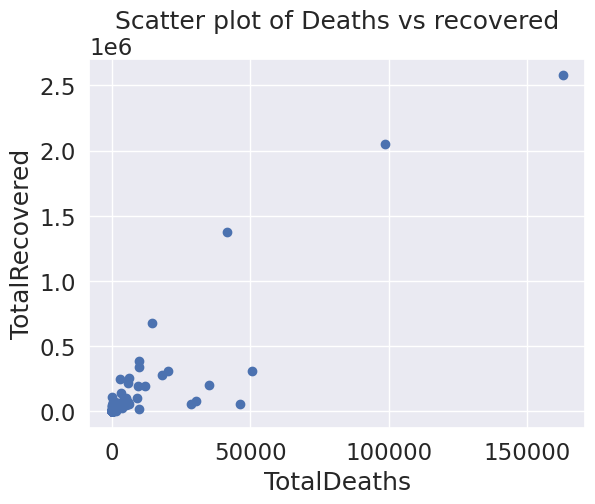

In [85]:
xscatter = df2["TotalDeaths"]
yscatter = df2["TotalRecovered"]
plt.scatter(xscatter, yscatter)
plt.xlabel("TotalDeaths")
plt.ylabel("TotalRecovered")
plt.title("Scatter plot of Deaths vs recovered")
plt.show()

1e6 = 10^6 = 1,000,000. As you can see, the countries with the most deaths also have the most people recovering from covid.

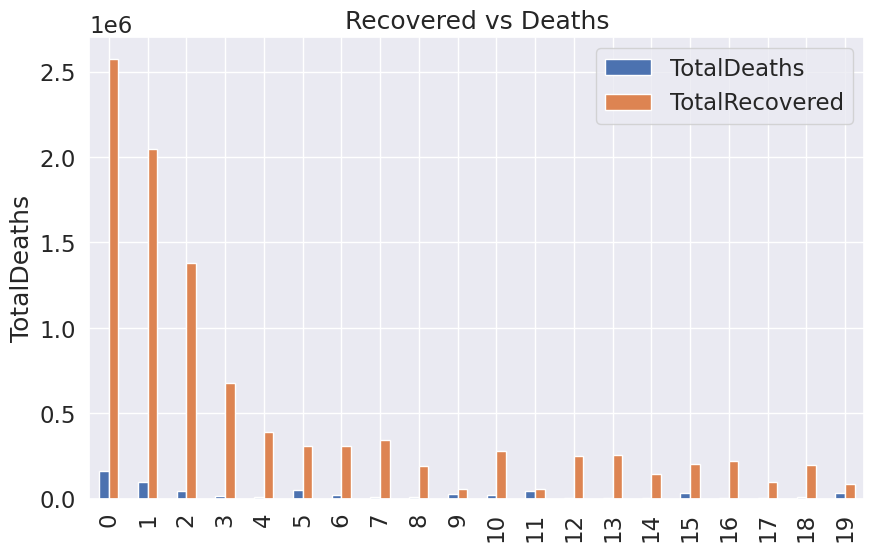

In [86]:
# Plot a bar graph of the totaldeaths vs totalrecovered columns
ax = df2.head(20)[['TotalDeaths', 'TotalRecovered']].plot(kind='bar', figsize=(10, 6))

# Set the title and labels
ax.set_title('Recovered vs Deaths')
ax.set_ylabel('TotalDeaths')

# Show the plot
plt.show()

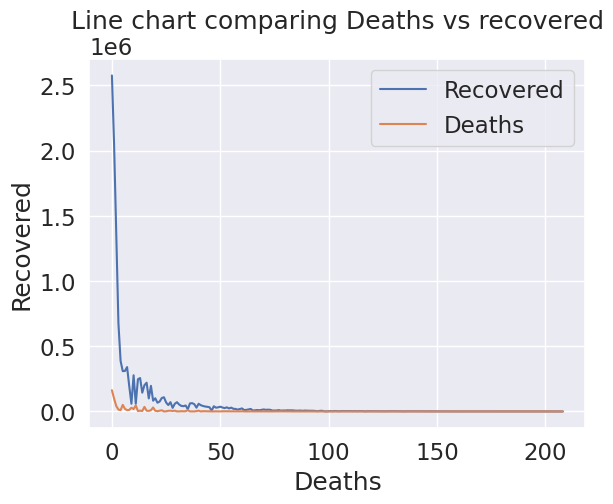

In [87]:
plt.plot(df2['TotalRecovered'], label='Recovered')
plt.plot(df2['TotalDeaths'], label='Deaths')

# Add axis labels and a title
plt.xlabel('Deaths')
plt.ylabel('Recovered')
plt.title('Line chart comparing Deaths vs recovered')

# Add a legend
plt.legend()

# Display the chart
plt.show()

Line graphs suggests that the more the recoveries the more the total deaths in that country,

Now lets look at the Continent of North America

In [88]:
df2_north_america = df2.loc[df2['Continent'] == 'North America']

<Axes: xlabel='TotalRecovered', ylabel='TotalDeaths'>

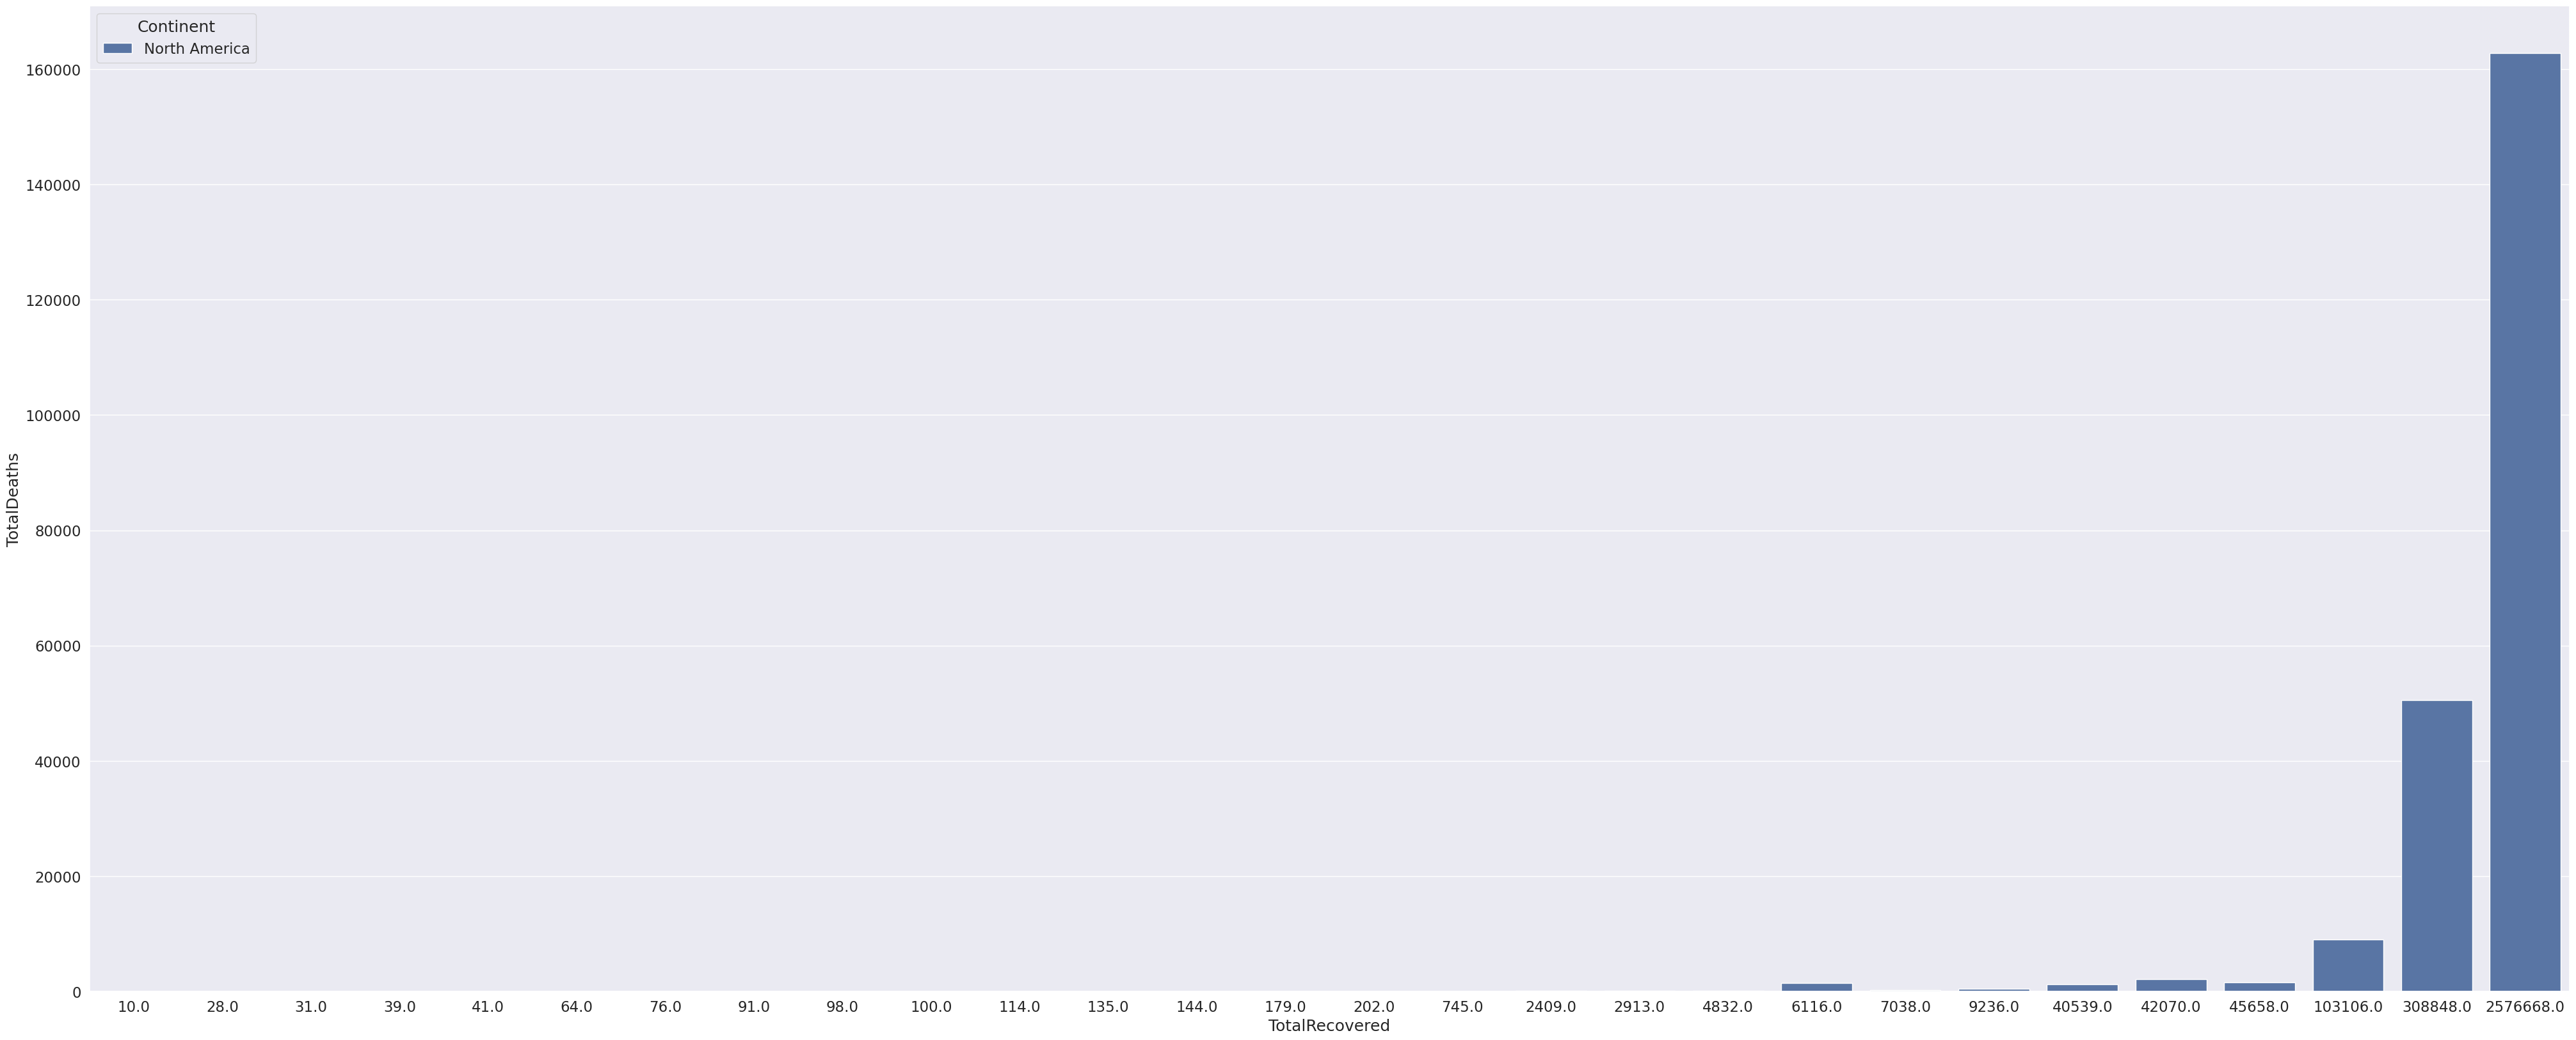

In [89]:
plt.figure(figsize=(50,20))
sns.barplot(x='TotalRecovered', y='TotalDeaths', hue='Continent', data=df2_north_america)

We do not know which countries in North America these stats pertain to, lets find out

In [90]:
selected_columns = ['TotalRecovered', 'TotalDeaths', 'Continent', 'Country/Region']
threshold = 100000
north_america_df = df2[df2['Continent'] == 'North America']
display_df = north_america_df[selected_columns]
display_df


,TotalRecovered,TotalDeaths,Continent,Country/Region
0,2576668,162804,North America,USA
5,308848,50517,North America,Mexico
23,103106,8966,North America,Canada
33,40539,1246,North America,Dominican Republic
34,45658,1574,North America,Panama
42,42070,2119,North America,Guatemala
46,6116,1423,North America,Honduras
65,7038,200,North America,Costa Rica
68,9236,513,North America,El Salvador
88,4832,171,North America,Haiti


Now lets look at USA indivdually.

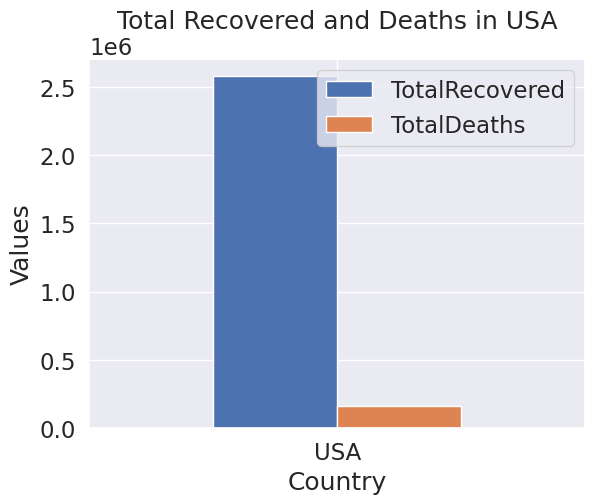

In [91]:
df2_na = df2[df2['Country/Region'] == 'USA']
df3_na = df2_na[selected_columns].query('TotalRecovered > @threshold and TotalDeaths > @threshold')  # Query for high values
ax = df3_na.plot.bar(x='Country/Region', rot=0)
ax.set_xlabel("Country")
ax.set_ylabel("Values")
ax.set_title("Total Recovered and Deaths in USA")
plt.show()

In [92]:
df2.describe()

,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop
count,187,187,187,187,187,187,187,187,187,187,187
mean,33644110,102495,1980,3813,300,65794,1706,30917,546,3373,99
std,110044222,456241,397,15526,47,267982,223,182611,1650,5325,175
min,4992,10,20,1,1,8,42,0,1,7,0
25%,2081166,1216,1980,22,300,833,1706,218,18,344,6
50%,9197590,6375,1980,119,300,4974,1706,1346,239,1274,29
75%,29536692,43994,1980,800,300,30828,1706,9568,534,4042,98
max,1381344997,5032179,6590,162804,819,2576668,4140,2292707,18296,39922,1238


#### Our observations so far:
- Unfortunately some key columns were missing a LOT of values which have been filled with a fabricated mean value.
- Population max is 1,400,000,000.
- Cases max of 5,000,000
- Overall deaths go to a max of 163,000 with the minimum being 0
- The average no. of cases per one million are 3,373 cases
- The average no. of deaths per one million are 99 deaths
- IQR of population is 27,500,000 (50%)
- This dataset has no obvious target variable, it can be used for clustering not classification
- Africa is responsible for just under 30% of the records due to the number of countries in Africa.

<Figure size 35000x35000 with 0 Axes>

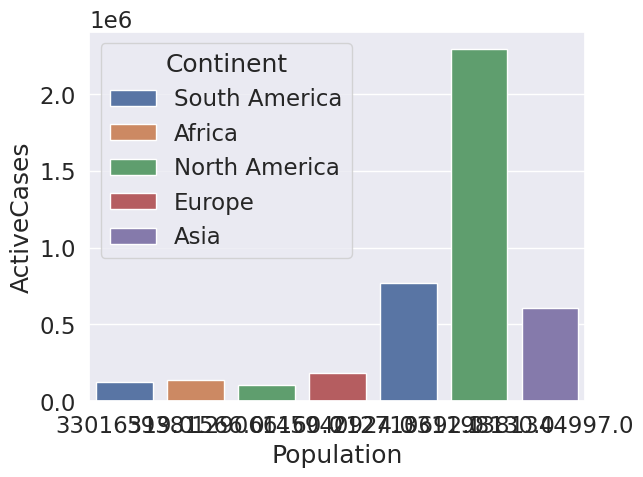

<Figure size 35000x35000 with 0 Axes>

In [93]:
sns.barplot(data = df2.head(7),
            x = 'Population',
            y = 'ActiveCases',
            hue = 'Continent');
plt.figure(figsize=(350, 350))

Ram space on colab was low, could not enlarge figure above.

In [94]:
df2[['Population', 'Continent', 'Country/Region']]

,Population,Continent,Country/Region
0,331198130,North America,USA
1,212710692,South America,Brazil
2,1381344997,Asia,India
3,145940924,Europe,Russia
4,59381566,Africa,South Africa
5,129066160,North America,Mexico
6,33016319,South America,Peru
7,19132514,South America,Chile
8,50936262,South America,Colombia
9,46756648,Europe,Spain


Here we compare random instances of population vs cases

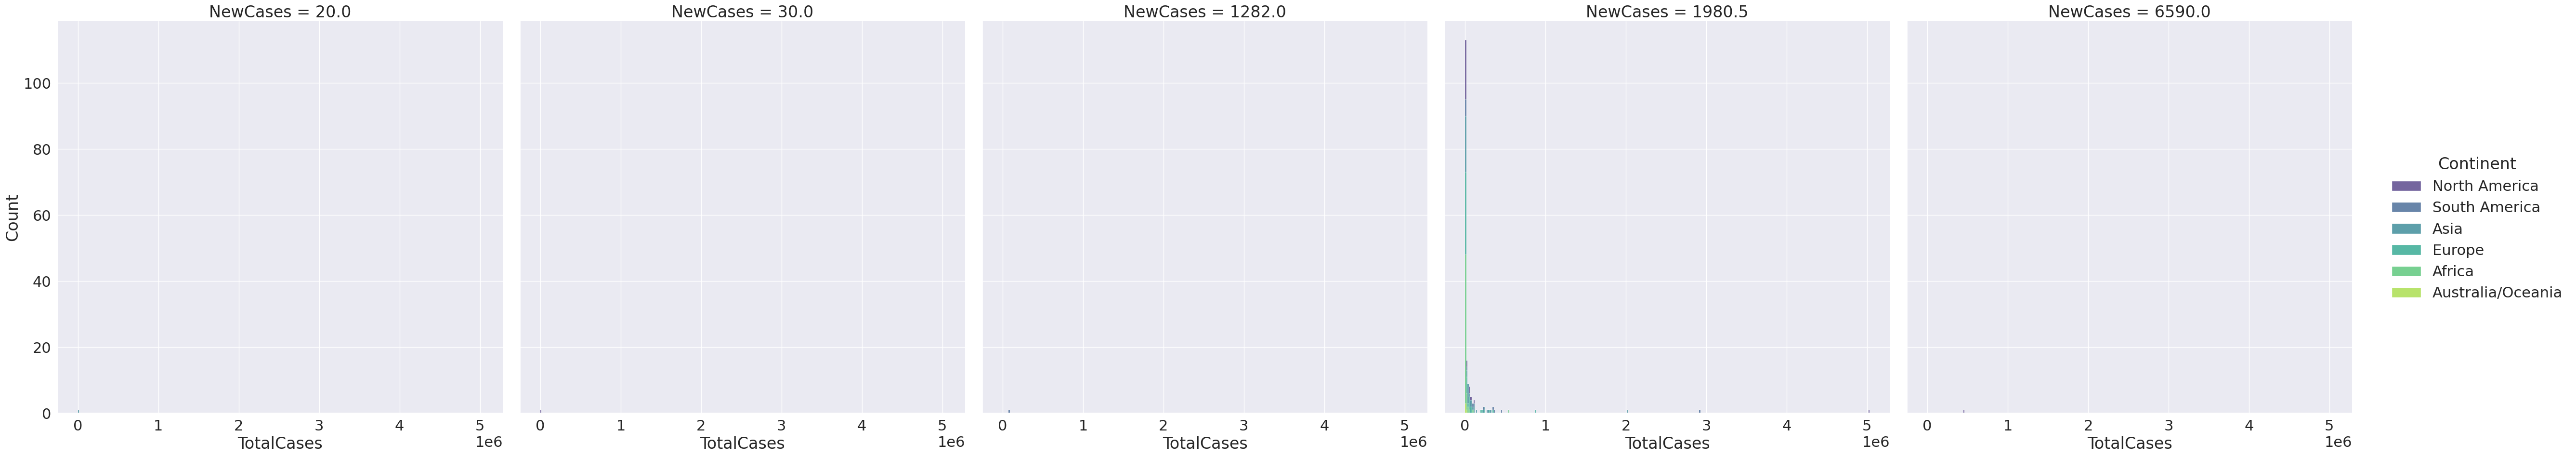

In [95]:
sns.set(font_scale = 2)
sns.displot(data = df2, x = 'TotalCases', col = 'NewCases',
            hue = 'Continent', multiple = 'stack',
            height = 10, palette = 'viridis');

Here we compare totalcases to newcases based on the continent. The reason for the biased distribution of results is because NewCases was filled with the mean and 95% of those are in one graph

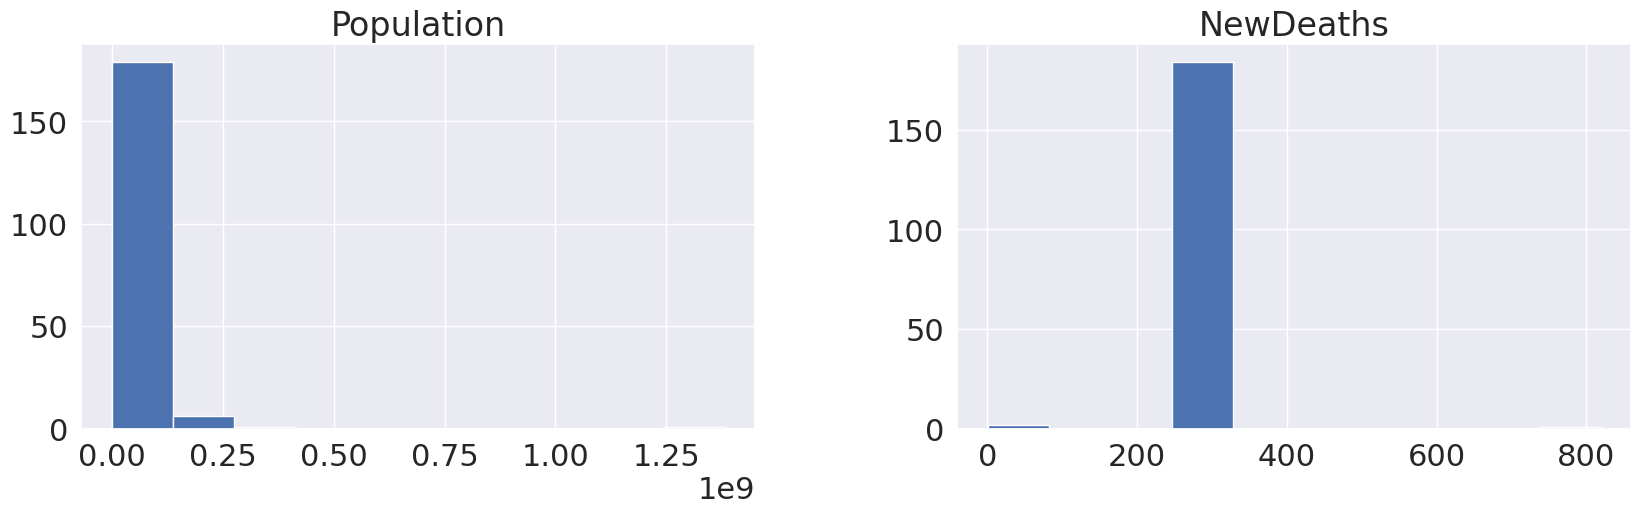

In [96]:
df2.hist(['Population', 'NewDeaths'], figsize = (20,5));

Most new deaths are the value 300 due to the mean value. 1e9 = 10^9 = 1,000,000,000

In [98]:
df2.groupby('Continent').mean().sort_values(by = 'Population', ascending = True)

<ipython-input-98-6aef04441b1c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby('Continent').mean().sort_values(by = 'Population', ascending = True)


,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop
Continent,,,,,,,,,,,
Australia/Oceania,10097767,5412,1980,70,300,3134,1706,2208,414,285,4
Europe,16613204,66269,1980,4561,300,40498,1706,13019,258,4075,215
North America,21031712,211394,2075,8209,319,112555,1793,90631,1128,3085,111
Africa,24361198,18390,1980,402,300,12605,1706,5383,284,1147,18
South America,33162075,349482,1927,11914,283,239703,1647,97864,1100,8055,217
Asia,74847679,111644,1934,2396,293,83512,1666,25736,650,4574,44


In [99]:
df2[['Continent', 'TotalDeaths']].groupby('Continent').mean().sort_values(by = 'Continent', ascending = True)

,TotalDeaths
Continent,
Africa,402
Asia,2396
Australia/Oceania,70
Europe,4561
North America,8209
South America,11914


Although Africa has the most records, South America is the continent responsible for the most deaths

In [100]:
df2[['Country/Region', 'Tot Cases/1M pop']].groupby('Country/Region').mean().sort_values(by = 'Country/Region', ascending = True)

,Tot Cases/1M pop
Country/Region,
Afghanistan,946
Albania,2091
Algeria,766
Andorra,12216
Angola,45
Antigua and Barbuda,939
Argentina,5044
Armenia,13435
Aruba,2462


All countries/regions and their total cases per 1,000,000 population

In [101]:
def mean_aggregation(data, Split1, Split2, Agg_feature):
  return data.groupby([Split1, Split2])[Agg_feature].mean()

In [102]:
mean_aggregation(df2, 'Continent', 'Country/Region', 'ActiveCases').to_frame()

ActiveCases
Continent         Country/Region                     
Africa            Algeria                        9115
                  Angola                          899
                  Benin                           298
                  Botswana                        739
                  Burkina Faso                    143
                  Burundi                          90
                  CAR                            2920
                  Cabo Verde                      697
                  Cameroon                       2007
                  Chad                             28
                  Comoros                          49
                  Congo                          1899
                  DRC                            1046
                  Djibouti                        214
                  Egypt                         41157
                  Equatorial Guinea              2556
                  Eswatini                       1437
                  Ethiopia                      11508
                  Gabon                          2127
                  Gambia                          783
                  Ghana                          3059
                  Guinea                          858
                  Guinea-Bissau                  1061
                  Ivory Coast                    3860
                  Kenya                         13568
                  Lesotho                         544
                  Liberia                         441
                  Libya                          4120
                  Madagascar                     2244
                  Malawi                         2217
                  Mali                            474
                  Mauritania                      996
                  Mauritius                         0
                  Mayotte                         265
                  Morocco                        8642
                  Mozambique                     1310
                  Namibia                        2074
                  Niger                            27
                  Nigeria                       11884
                  Rwanda                          848
                  Réunion                          74
                  Sao Tome and Principe            66
                  Senegal                        3391
                  Sierra Leone                    383
                  Somalia                        1406
                  South Africa                 141264
                  South Sudan                    1228
                  Sudan                          4823
                  Tanzania                        305
                  Togo                            293
                  Tunisia                         350
                  Uganda                          116
                  Western Sahara                    1
                  Zambia                         1179
                  Zimbabwe                       2991
Asia              Afghanistan                    9758
                  Armenia                        7491
                  Azerbaijan                     3493
                  Bahrain                        2788
                  Bangladesh                   102521
                  Brunei                            0
                  Cyprus                          333
                  Georgia                         202
                  Hong Kong                      1346
                  India                        606387
                  Indonesia                     37587
                  Iran                          24678
                  Iraq                          34417
                  Israel                        25556
                  Japan                         12360
                  Jordan                           50
                  Kazakhstan                    26013
                  Kuwait                      